**Exploratory Data Analysis for the NFL Cut**

In [21]:
import pandas as pd

file_path = './data/imputed_data.csv'
data = pd.read_csv(file_path)
data.head()

,Name,Position,College,Round,Pick,Stat URL,Height,Weight,40 Yard Dash,Bench Press,...,rec_td,rush_att,rush_yds,rush_yds_per_att,rush_td,scrim_att,scrim_yds,scrim_yds_per_att,scrim_td,Year
0,Emmanuel Acho,OLB,Texas,6,204,https://www.sports-reference.com/cfb/players/e...,74.0,238.0,4.64,24.00,...,5.29,199.20,1282.58,8.83,14.91,239.71,1747.91,8.22,20.20,2012
1,Joe Adams,WR,Arkansas,4,104,https://www.sports-reference.com/cfb/players/j...,71.0,179.0,4.51,14.59,...,8.50,4.00,69.50,11.65,0.00,96.00,1393.50,14.45,8.50,2012
2,Chas Alecxih,DT,Pittsburgh,0,0,https://www.sports-reference.com/cfb/players/c...,76.0,296.0,5.31,19.00,...,0.00,1.19,5.20,-0.68,0.36,1.36,5.55,0.86,0.36,2012
3,Frank Alexander,DE,Oklahoma,4,103,https://www.sports-reference.com/cfb/players/f...,76.0,270.0,4.80,24.48,...,2.17,22.98,75.37,4.12,4.24,36.81,231.59,6.49,6.41,2012
4,Antonio Allen,S,South Carolina,7,242,https://www.sports-reference.com/cfb/players/a...,73.0,210.0,4.58,17.00,...,1.68,374.69,2061.25,4.94,19.21,420.39,2397.36,6.43,20.89,2012


**Dataset Features**

In [22]:
data.columns

Index(['Name', 'Position', 'College', 'Round', 'Pick', 'Stat URL', 'Height',
       'Weight', '40 Yard Dash', 'Bench Press', 'Vertical Jump', 'Broad Jump',
       '3 Cone Drill', 'Shuttle', 'conf_abbr', 'games', 'seasons',
       'tackles_solo', 'tackles_assists', 'tackles_total', 'tackles_loss',
       'sacks', 'def_int', 'def_int_yds', 'def_int_td', 'pass_defended',
       'fumbles_rec', 'fumbles_rec_yds', 'fumbles_rec_td', 'fumbles_forced',
       'rec', 'rec_yds', 'rec_yds_per_rec', 'rec_td', 'rush_att', 'rush_yds',
       'rush_yds_per_att', 'rush_td', 'scrim_att', 'scrim_yds',
       'scrim_yds_per_att', 'scrim_td', 'Year'],
      dtype='object')

**Visualization 1: Cumulative Performance Trends by Draft Round**

***Stacked area plots to visualize cumulative stats like tackles_total, rush_yds, rec_yds over different rounds.***

The "Cumulative Performance Trends by Draft Round" graph provides several insights into the performance of NFL draft picks:

1. **Draft Round Impact**: It shows how player performance accumulates over draft rounds. Typically, earlier draft picks have higher cumulative performance metrics, such as tackles, rushing yards, and receiving yards. This aligns with the expectation that higher draft picks are expected to contribute more to their teams.

2. **Variability Across Metrics**: The graph highlights the varying impact of draft rounds on different performance metrics. For example, while tackles_total might show a steady increase across rounds, rush_yds and rec_yds might exhibit more variability, indicating that players selected later in the draft rounds might excel more in certain areas like rushing or receiving.

3. **Strategic Insights**: Coaches and team managers can use this graph to inform their draft strategies. They can see which metrics tend to increase steadily or vary across draft rounds and adjust their drafting priorities accordingly. For instance, if rushing yards tend to increase significantly in later rounds, they might focus more on selecting running backs in those rounds.

4. **Evaluation of Draft Picks**: Teams can evaluate the effectiveness of their draft picks based on their cumulative performance over time. By comparing the actual performance of drafted players to the trends shown in the graph, teams can assess whether their draft picks have met expectations or if there are patterns that need further analysis or adjustment in their drafting strategies.

Overall, this graph provides valuable insights into how player performance metrics evolve across draft rounds, aiding in strategic decision-making and evaluation within the NFL Draft process.

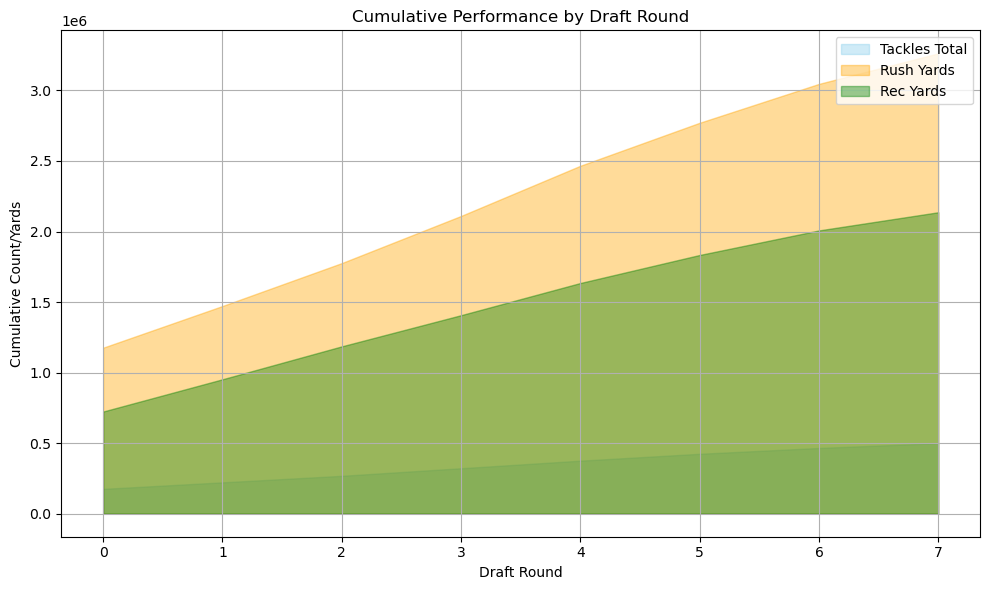

In [23]:
import matplotlib.pyplot as plt

df = pd.DataFrame(data)

# Aggregate data by draft round and calculate cumulative sum of selected metrics
draft_rounds = sorted(df['Round'].unique())
tackles_total = df.groupby('Round')['tackles_total'].sum().cumsum()
rush_yds = df.groupby('Round')['rush_yds'].sum().cumsum()
rec_yds = df.groupby('Round')['rec_yds'].sum().cumsum()

# Create area plots
plt.figure(figsize=(10, 6))

plt.fill_between(draft_rounds, tackles_total, color='skyblue', alpha=0.4, label='Tackles Total')
plt.fill_between(draft_rounds, rush_yds, color='orange', alpha=0.4, label='Rush Yards')
plt.fill_between(draft_rounds, rec_yds, color='green', alpha=0.4, label='Rec Yards')

# Add labels and title
plt.xlabel('Draft Round')
plt.ylabel('Cumulative Count/Yards')
plt.title('Cumulative Performance by Draft Round')
plt.xticks(draft_rounds)
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


**Visualisation 2: Mean Values of Draft Metrics by Round**

From the "Mean Values of Draft Metrics by Round" graph, we can derive several insights and intuitions:

1. **Round Impact on Metrics**: We can observe how certain metrics, such as Bench Press and Rec Yards per Reception, vary across different rounds of the NFL Draft. This can provide insight into whether certain metrics are more valued or prioritized in earlier rounds compared to later rounds.

2. **Trends and Patterns**: The graph may reveal any trends or patterns in how metrics change as the draft progresses through its rounds. For example, we might see a gradual increase or decrease in certain metrics across rounds.

3. **Draft Strategy**: Teams may have different strategies for selecting players based on their performance in specific metrics. The graph can give an indication of whether there's a consistent strategy regarding these metrics across teams or rounds.

4. **Positional Differences**: Depending on the metrics chosen, we may observe differences in how metrics vary across rounds for different player positions. For example, metrics valued highly for offensive players might show different trends compared to those for defensive players.

5. **Comparison with Historical Data**: By comparing the current draft metrics with historical data, we can assess whether there have been any shifts or changes in the importance of certain metrics over time.

6. **Identification of Outliers**: The graph may highlight any outliers or anomalies in the data, indicating players who excel or underperform relative to their draft round in specific metrics.

Overall, this graph can offer valuable insights into the draft process, team strategies, player evaluation, and the evolving landscape of player performance metrics in the NFL Draft.

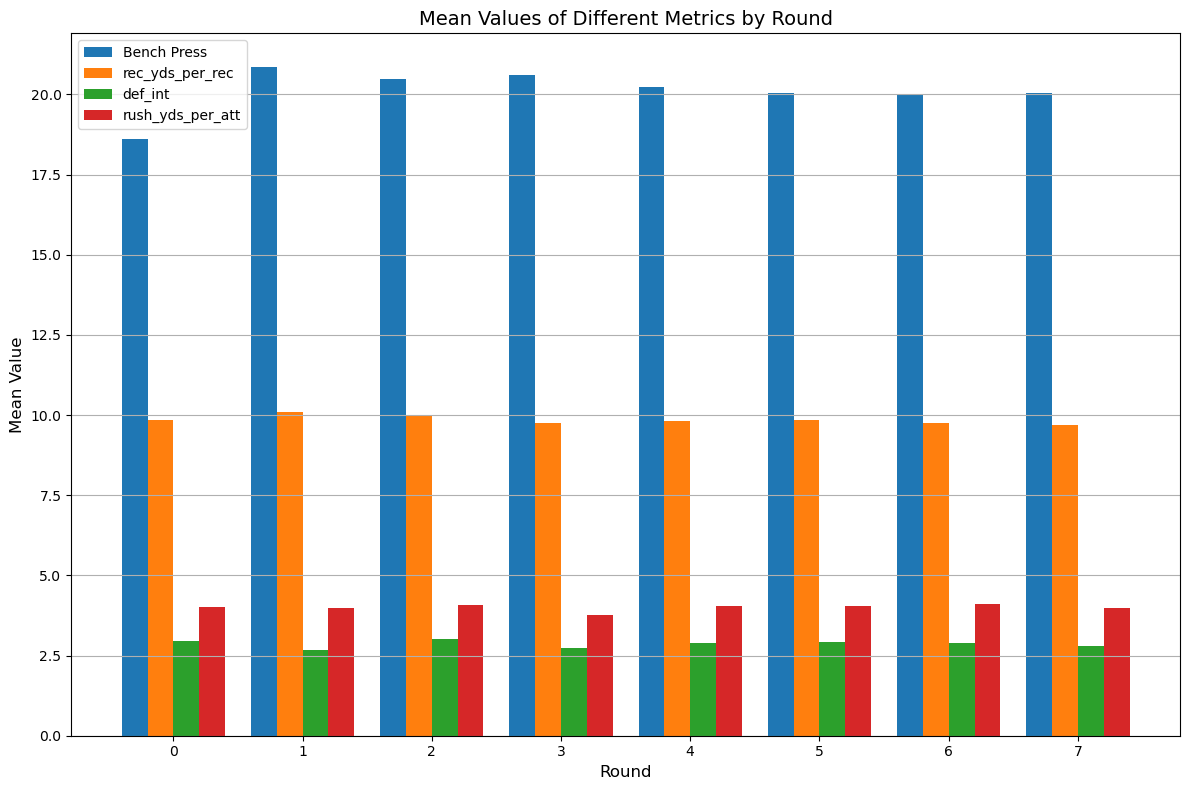

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Columns you want to visualize
columns_to_visualize = ['Bench Press', 'rec_yds_per_rec', 'def_int', 'rush_yds_per_att']

# Grouping data by round and calculating the mean for each column
round_stats = df.groupby('Round')[columns_to_visualize].mean()

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))

# Width of each bar
bar_width = 0.2
index = round_stats.index

# Plot each column
for i, column in enumerate(columns_to_visualize):
    ax.bar(index + i * bar_width, round_stats[column], bar_width, label=column)

ax.set_xlabel('Round', fontsize=12)
ax.set_ylabel('Mean Value', fontsize=12)
ax.set_title('Mean Values of Different Metrics by Round', fontsize=14)
ax.set_xticks(index + bar_width * (len(columns_to_visualize) - 1) / 2)
ax.set_xticklabels(index)
ax.legend()
ax.grid(axis='y')

plt.tight_layout()
plt.show()


**Visualization 3: Trend Analysis of Performance Metrics Over Years**

"Trend Analysis of Performance Metrics Over Years" explores the evolution of player performance metrics across various categories over time. This analysis provides valuable insights into how players' skills and capabilities have changed or developed over different seasons.

Key benefits and insights of this trend analysis include:

1. **Identifying Performance Trends**: By plotting performance metrics over multiple years, teams can observe any consistent trends or patterns in player performance. This helps in understanding how certain metrics have improved or declined over time.

2. **Assessing Long-term Development**: Examining performance metrics over several years allows teams to track the long-term development of players. This insight is crucial for evaluating the potential growth trajectory of players and forecasting their future performance.

3. **Spotting Breakout Seasons**: Trends analysis can reveal standout seasons where players demonstrate significant improvements in certain metrics. These breakout seasons could indicate a player's emergence as a top performer or a potential draft prospect.

4. **Identifying Consistency**: Consistency in performance is a desirable trait in players. This analysis helps teams identify players who consistently perform well across multiple seasons, making them reliable assets for their teams.

5. **Understanding Career Trajectories**: By analyzing performance trends over years, teams gain insights into the trajectory of a player's career. This includes identifying peak performance years, decline phases, or periods of injury recovery.

6. **Informing Draft Strategy**: Trends analysis informs draft strategy by providing a deeper understanding of player performance dynamics over time. Teams can use this information to prioritize players who demonstrate consistent improvement or have a track record of high performance.

7. **Evaluating Player Potential**: Trends analysis helps in assessing the potential of players by considering their historical performance trends. Players showing consistent improvement may have untapped potential that teams can capitalize on.

In summary, "Trend Analysis of Performance Metrics Over Years" offers valuable insights into player development, consistency, and potential, enabling teams to make informed decisions in player evaluation, draft planning, and talent acquisition strategies.

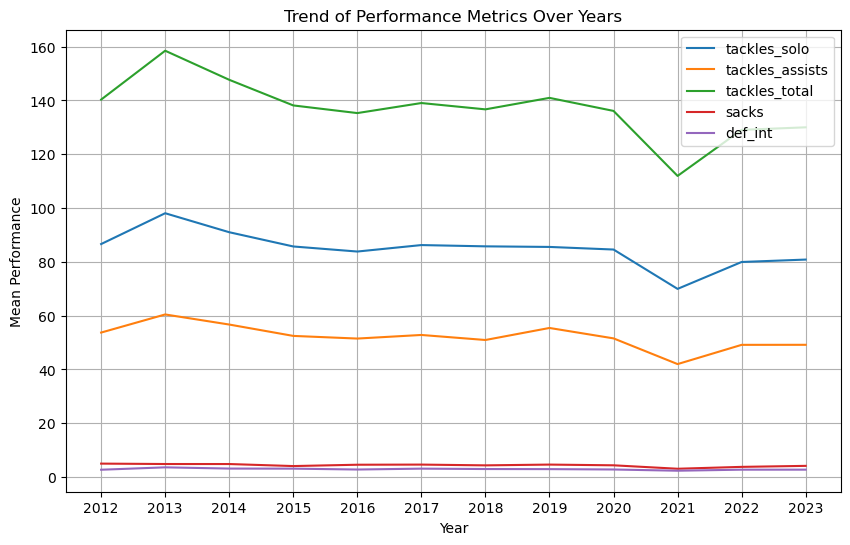

In [83]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data

# Performance metrics to include in the plot
performance_metrics = ['tackles_solo', 'tackles_assists', 'tackles_total', 'sacks', 'def_int']

# Grouping data by year and calculating mean performance metrics
mean_performance_by_year = df.groupby('Year')[performance_metrics].mean()

# Line plot for performance metrics over years
plt.figure(figsize=(10, 6))
for metric in performance_metrics:
    plt.plot(mean_performance_by_year.index, mean_performance_by_year[metric], label=metric)

plt.title('Trend of Performance Metrics Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Performance')
plt.legend()
plt.grid(True)
plt.xticks(mean_performance_by_year.index)
plt.show()

